### Data Pre-Processing & Preliminary Examination:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# The file is a txt file with columns separated by the pipe (|)
# and that there are no column headers
var_names = ["Credit_Score", "First_Payment_Date", "First_Time_Homebuyer", "Maturity_Date", "MSA",
             "Mortgage_Insurance_Percentage", "Number_Units", "Occupancy_Status", "CLTV", "DTI",
             "UPB", "LTV", "Interest_Rate", "Channel", "Prepayment_Penalty", "Amortization_Type",
             "State", "Property_Type", "Postal_Code", "Sequence_Number", "Purpose", "Loan_Term",
             "Number_Borrowers", "Seller_Name", "Servicer_Name", "Super_Conforming", "Pre_HARP_Loan",
             "Program_Indicator", "HARP_Indicator", "Valuation_Method", "Interest_Only", "Insurance_Cancellation"]

loan_data = pd.read_table("sample_orig_2022.txt", delimiter = "|", names = var_names)

In [5]:
loan_data.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer,Maturity_Date,MSA,Mortgage_Insurance_Percentage,Number_Units,Occupancy_Status,CLTV,DTI,...,Number_Borrowers,Seller_Name,Servicer_Name,Super_Conforming,Pre_HARP_Loan,Program_Indicator,HARP_Indicator,Valuation_Method,Interest_Only,Insurance_Cancellation
0,768,202203,N,203702,NaN,0,1,P,57,28,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
1,781,202203,N,205202,NaN,0,1,S,80,44,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
2,809,202204,N,204203,36540.0,0,1,I,53,28,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
3,661,202203,N,205202,26900.0,0,1,P,48,42,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
4,668,202203,Y,205202,36540.0,0,1,P,80,40,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Credit_Score                   50000 non-null  int64  
 1   First_Payment_Date             50000 non-null  int64  
 2   First_Time_Homebuyer           50000 non-null  object 
 3   Maturity_Date                  50000 non-null  int64  
 4   MSA                            44839 non-null  float64
 5   Mortgage_Insurance_Percentage  50000 non-null  int64  
 6   Number_Units                   50000 non-null  int64  
 7   Occupancy_Status               50000 non-null  object 
 8   CLTV                           50000 non-null  int64  
 9   DTI                            50000 non-null  int64  
 10  UPB                            50000 non-null  int64  
 11  LTV                            50000 non-null  int64  
 12  Interest_Rate                  50000 non-null 

In [7]:
# Select relevant columns for our analysis
selected_columns = ["Credit_Score", "LTV", "DTI", "UPB", "Occupancy_Status", "Purpose", "Interest_Rate"]
loan_data = loan_data[selected_columns]

In [8]:
# Filter out placeholder values
loan_data = loan_data[
    (loan_data["Credit_Score"] != 9999) &
    (loan_data["DTI"] != 999) &
    (loan_data["LTV"] != 999) &
    (loan_data["Purpose"] != "9") &
    (loan_data["Occupancy_Status"] != "9")
]

In [9]:
# Scale the UPB
loan_data["UPB"] = loan_data["UPB"] / 1000

In [10]:
loan_data.dropna(inplace=True)

In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49979 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Credit_Score      49979 non-null  int64  
 1   LTV               49979 non-null  int64  
 2   DTI               49979 non-null  int64  
 3   UPB               49979 non-null  float64
 4   Occupancy_Status  49979 non-null  object 
 5   Purpose           49979 non-null  object 
 6   Interest_Rate     49979 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.1+ MB


In [12]:
loan_data.head()

,Credit_Score,LTV,DTI,UPB,Occupancy_Status,Purpose,Interest_Rate
0,768,57,28,95.0,P,N,2.625
1,781,80,44,260.0,S,P,3.125
2,809,53,28,110.0,I,N,3.500
3,661,48,42,150.0,P,C,3.375
4,668,80,40,194.0,P,P,3.875


### Exploratory Data Analysis

In [13]:
# Summary statistics for numerical variables
loan_data.describe()

,Credit_Score,LTV,DTI,UPB,Interest_Rate
count,49979.000000,49979.000000,49979.000000,49979.000000,49979.000000
mean,743.789812,73.925869,36.913264,298.082435,5.092227
std,46.307824,18.563565,9.196819,160.800590,1.231644
min,596.000000,5.000000,1.000000,20.000000,1.750000
25%,711.000000,63.000000,31.000000,175.000000,4.125000
50%,751.000000,80.000000,39.000000,268.000000,5.250000
75%,782.000000,90.000000,44.000000,390.000000,5.990000
max,831.000000,97.000000,61.000000,1860.000000,8.125000


In [14]:
# Summary statistics for categorical variables
loan_data.describe(include=[object])

,Occupancy_Status,Purpose
count,49979,49979
unique,3,3
top,P,P
freq,44521,33326


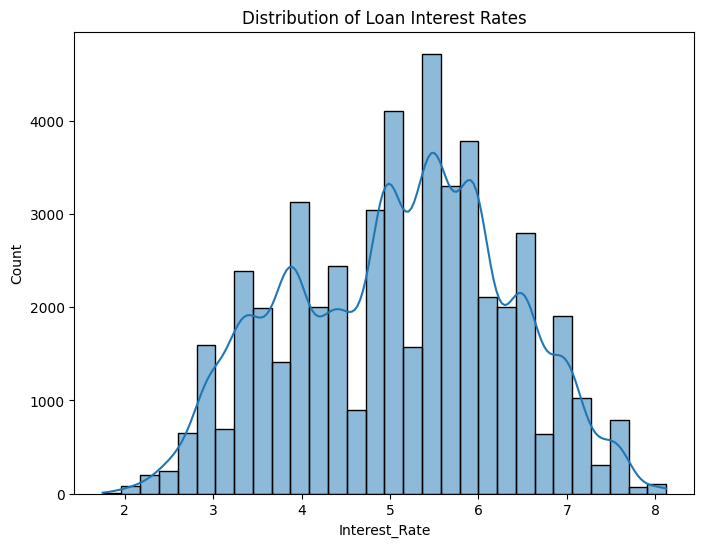

In [15]:
# Plot Interest rate distribution
plt.figure(figsize=(8, 6))
sns.histplot(loan_data["Interest_Rate"], bins=30, kde=True)
plt.title("Distribution of Loan Interest Rates")
plt.show()

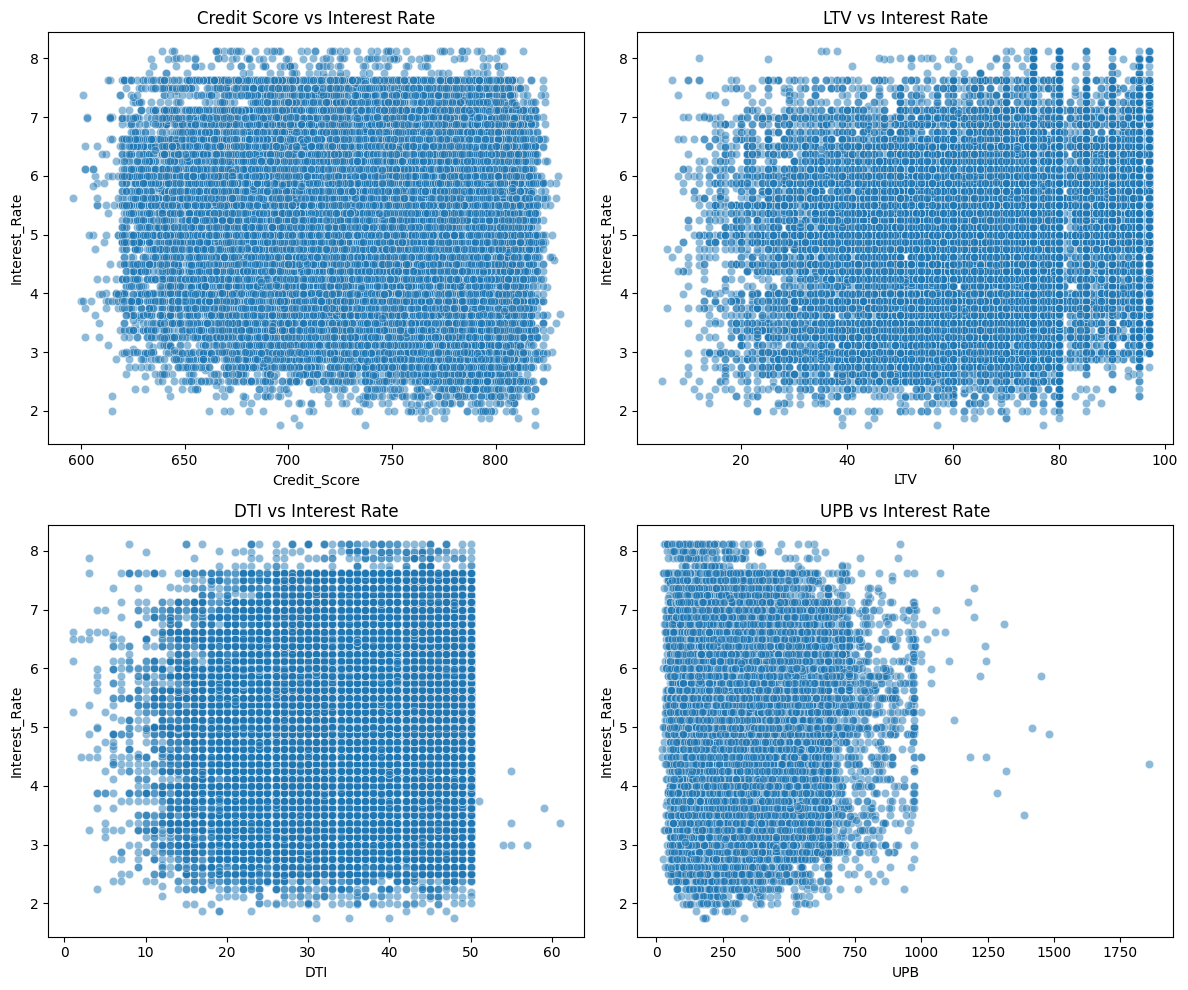

In [16]:
# Scatter Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=loan_data, x="Credit_Score", y="Interest_Rate", alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Credit Score vs Interest Rate")

sns.scatterplot(data=loan_data, x="LTV", y="Interest_Rate", alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("LTV vs Interest Rate")

sns.scatterplot(data=loan_data, x="DTI", y="Interest_Rate", alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("DTI vs Interest Rate")

sns.scatterplot(data=loan_data, x="UPB", y="Interest_Rate", alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("UPB vs Interest Rate")

plt.tight_layout()
plt.show()

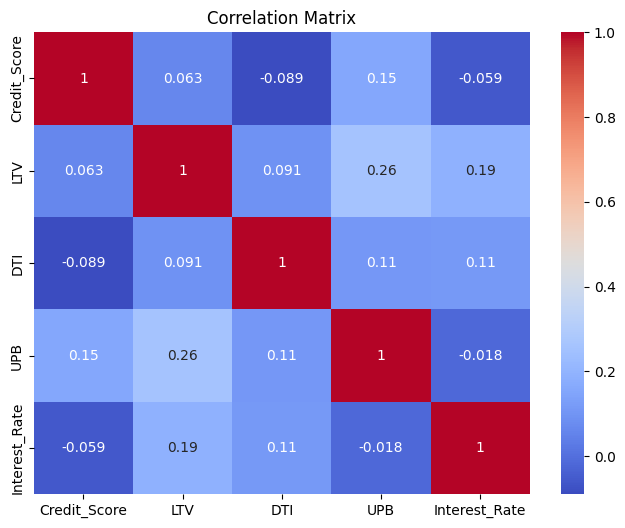

In [17]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loan_data[["Credit_Score", "LTV", "DTI", "UPB", "Interest_Rate"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

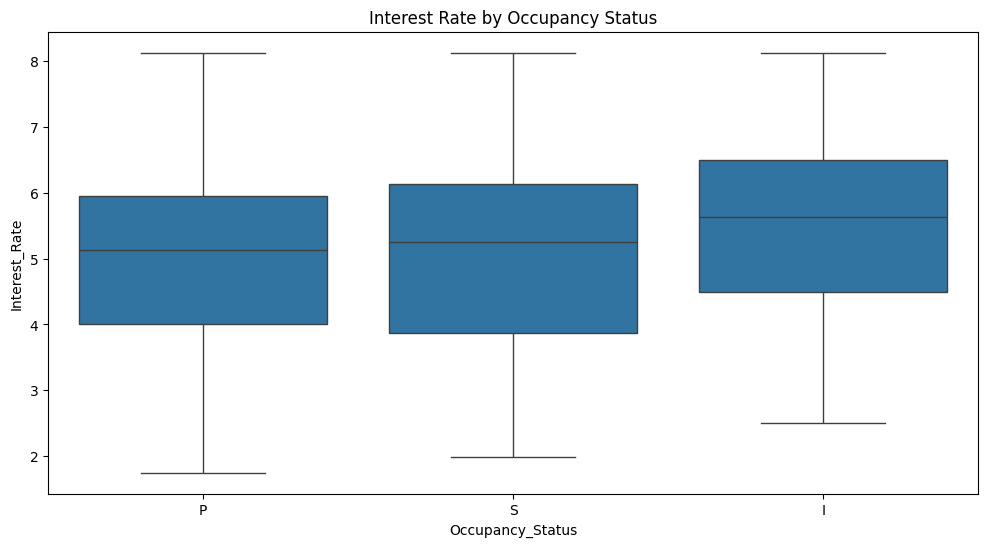

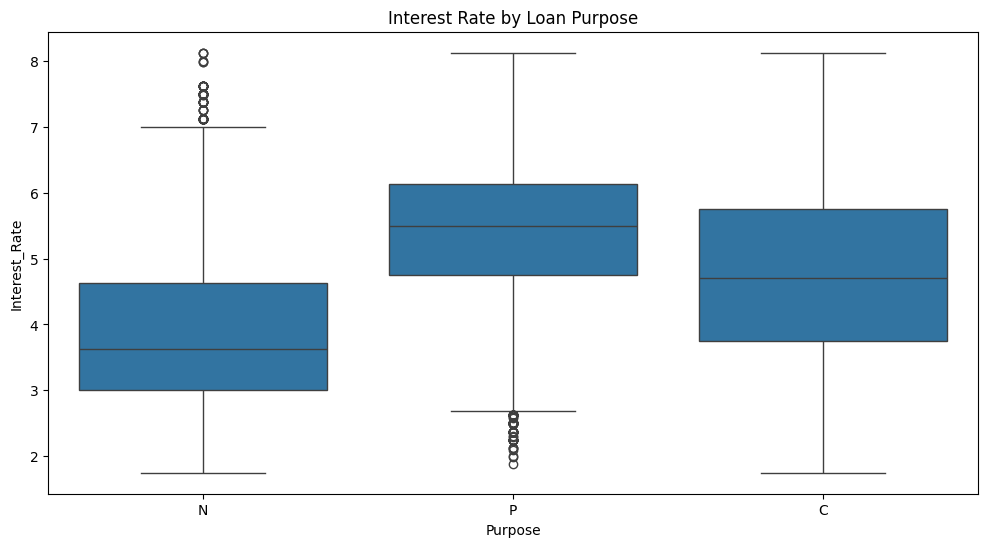

In [18]:
# Boxplots for Categorical Features
plt.figure(figsize=(12, 6))
sns.boxplot(x="Occupancy_Status", y="Interest_Rate", data=loan_data)
plt.title("Interest Rate by Occupancy Status")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Purpose", y="Interest_Rate", data=loan_data)
plt.title("Interest Rate by Loan Purpose")
plt.show()

### Modeling

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [29]:
# Define the target variable (Interest_Rate) and predictors
X = loan_data.drop(columns=['Interest_Rate'])
y = loan_data['Interest_Rate']

# Define numerical and categorical features
numerical_features = ['Credit_Score', 'LTV', 'DTI', 'UPB']
categorical_features = ['Occupancy_Status', 'Purpose']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Preprocessing pipeline (standardize & encode categorical variables)
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_features),
    (OneHotEncoder(drop='first', sparse_output=False), categorical_features)
)

#### Baseline Model

In [34]:
# Set up baseline model using mean interest rate
baseline_preds = np.ones(len(y)) * y.mean()
baseline_mse = mean_squared_error(y, baseline_preds)

print("Baseline MSE:", baseline_mse)

Baseline MSE: 1.516917558227371


#### Multiple Regression Model

In [35]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Credit_Score', 'LTV', 'DTI',
                                                   'UPB']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Occupancy_Status',
                                                   'Purpose'])])),
                ('model', LinearRegression())])

In [38]:
# Predict on training and testing data
y_train_pred_lr = lr_pipeline.predict(X_train)
y_test_pred_lr = lr_pipeline.predict(X_test)

# Calculate MSE for training and testing data
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

print("Training MSE:", train_mse_lr)
print("Testing MSE:", test_mse_lr)

Training MSE: 1.2535167892154402
Testing MSE: 1.2753105913665423


In [39]:
# Extract model coefficients
lr = lr_pipeline.named_steps['model']
coefficients = lr.coef_
names = preprocessor.get_feature_names_out()

# Display coefficients in a DataFrame
pd.DataFrame(coefficients, index=names, columns=['Coefficient'])

,Coefficient
standardscaler__Credit_Score,-0.155676
standardscaler__LTV,0.048348
standardscaler__DTI,0.113768
standardscaler__UPB,-0.097815
onehotencoder__Occupancy_Status_P,-0.516778
onehotencoder__Occupancy_Status_S,-0.502418
onehotencoder__Purpose_N,-0.710042
onehotencoder__Purpose_P,0.710676


In [42]:
# Intercept
lr.intercept_

5.1581401345137365

In [41]:
# Determine feature importance
r = permutation_importance(lr_pipeline, X_test, y_test, n_repeats=10, random_state=42)
pd.DataFrame(r['importances_mean'], index=X_train.columns.tolist(), columns=['Importance'])

,Importance
Credit_Score,0.027883
LTV,0.003190
DTI,0.014520
UPB,0.011060
Occupancy_Status,0.026679
Purpose,0.265899


#### K-Nearest Neighbors

In [43]:
# KNN Pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

# Hyperparameter Tuning for KNN
param_grid_knn = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}
grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Credit_Score',
                                                                          'LTV',
                                                                          'DTI',
                                                                          'UPB']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Occupancy_Status',
                                                                          'Purpose'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [46]:
# Best parameters
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

Best KNN Parameters: {'model__n_neighbors': 50}


In [47]:
# Training and testing MSE
y_train_preds_knn = best_knn.predict(X_train)
y_test_preds_knn = best_knn.predict(X_test)

train_mse_knn = mean_squared_error(y_train, y_train_preds_knn)
test_mse_knn = mean_squared_error(y_test, y_test_preds_knn)

print("Training MSE:", train_mse_knn)
print("Testing MSE:", test_mse_knn)

Training MSE: 1.2057257236850762
Testing MSE: 1.2835521185410963


In [51]:
# Feature Importance (Permutation Importance)
r = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist(), columns=['Importance'])

,Importance
Credit_Score,0.031158
LTV,0.021359
DTI,0.019072
UPB,0.020268
Occupancy_Status,0.024768
Purpose,0.231742


#### Decision Tree

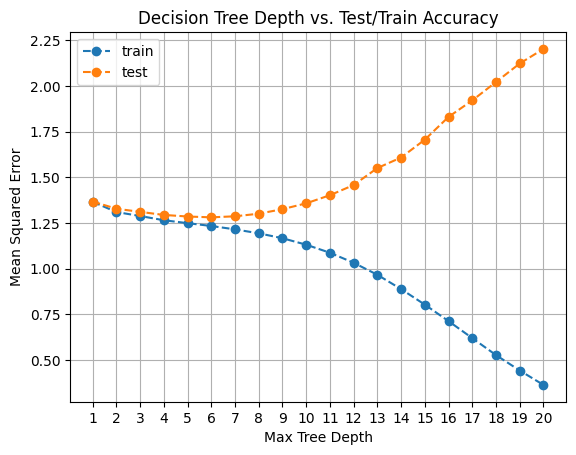

In [52]:
# Find optimal max depth while avoiding overfitting
train_scores = []
test_scores = []

for d in range(1, 21):  # Test max depths from 1 to 20
    dtree = Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(max_depth=d, random_state=42))
    ])
    dtree.fit(X_train, y_train)
    y_train_preds = dtree.predict(X_train)
    y_test_preds = dtree.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

# Plot train vs test MSE to find the optimal depth
plt.plot(range(1, 21), train_scores, 'o--', label='train')
plt.plot(range(1, 21), test_scores, 'o--', label='test')
plt.grid()
plt.legend()
plt.xticks(range(1, 21))
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy')
plt.show()

In [53]:
# Final Decision Tree model with optimal max depth (the depth showing lowest test MSE)
optimal_depth = 5
dtree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=optimal_depth, random_state=42))
])
dtree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Credit_Score', 'LTV', 'DTI',
                                                   'UPB']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Occupancy_Status',
                                                   'Purpose'])])),
                ('model', DecisionTreeRegressor(max_depth=5, random_state=42))])

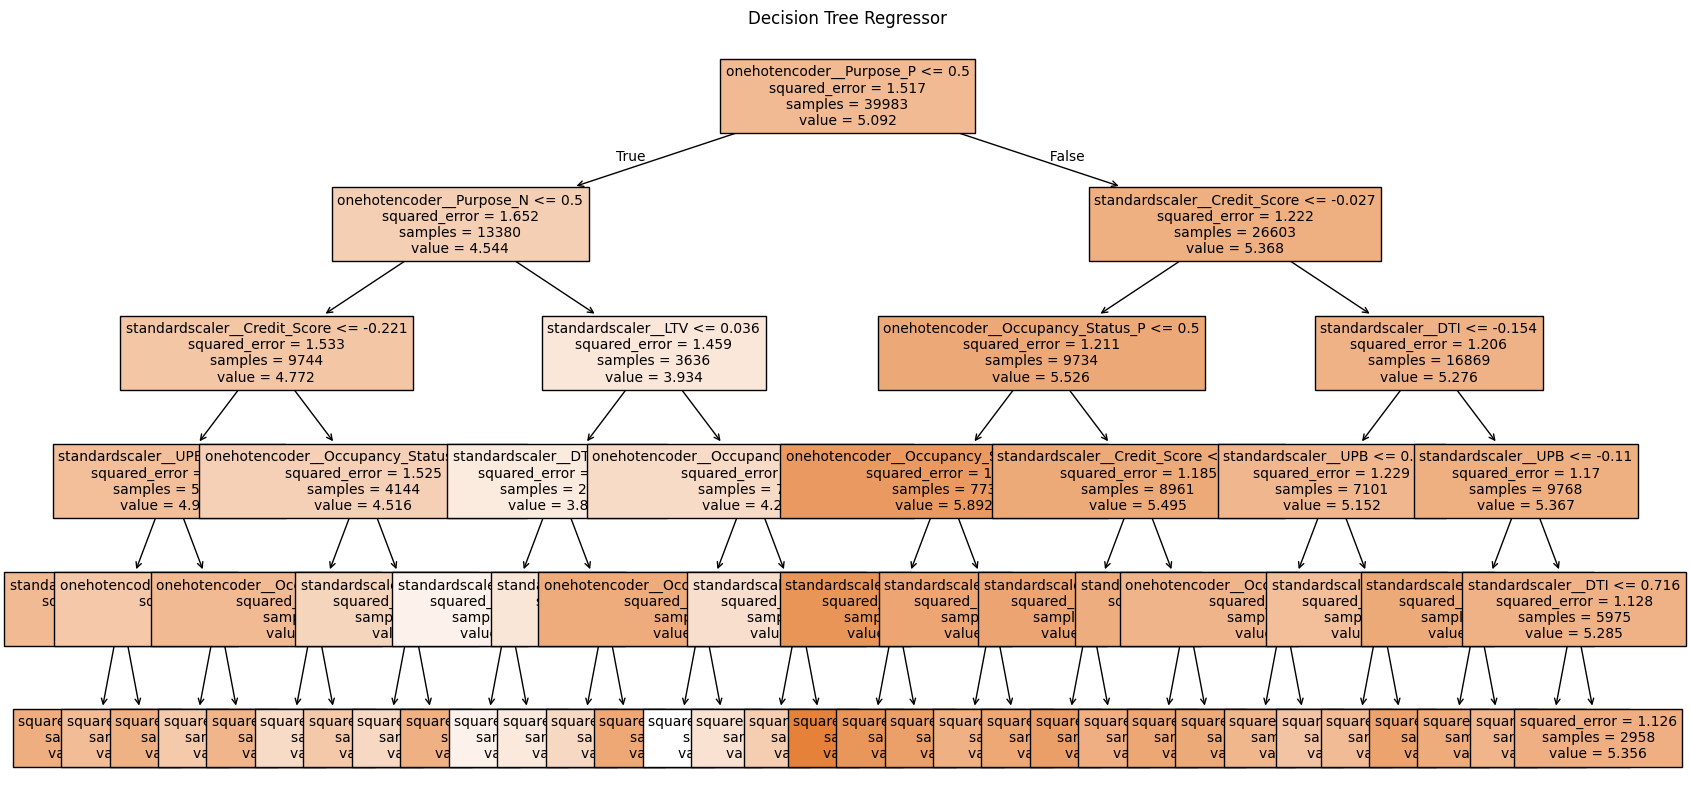

In [58]:
# Plot the Decision Tree
final_dtree = dtree_pipeline.named_steps['model']
plt.figure(figsize=(20, 10))
plot_tree(final_dtree, filled=True, feature_names=preprocessor.get_feature_names_out(), fontsize=10)
plt.title("Decision Tree Regressor")
plt.show()

In [60]:
# Calculate MSE for training and testing sets
y_train_preds_tree = dtree_pipeline.predict(X_train)
y_test_preds_tree = dtree_pipeline.predict(X_test)

train_mse_tree = mean_squared_error(y_train, y_train_preds_tree)
test_mse_tree = mean_squared_error(y_test, y_test_preds_tree)

print("Training MSE:", train_mse_tree)
print("Testing MSE:", test_mse_tree)

Training MSE: 1.2489402827659493
Testing MSE: 1.2853365322283412


In [61]:
# Feature Importance
r = permutation_importance(dtree_pipeline, X_test, y_test, n_repeats=10, random_state=42)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist(), columns=['Importance'])

,Importance
Credit_Score,0.027388
LTV,0.014157
DTI,0.011701
UPB,0.016880
Occupancy_Status,0.021169
Purpose,0.270171


#### Random Forest

In [62]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter Tuning for Random Forest
param_grid_rf = {'model__n_estimators': [50, 100, 150, 200],
                 'model__max_depth': [3, 5, 10, 15, None]}
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Credit_Score',
                                                                          'LTV',
                                                                          'DTI',
                                                                          'UPB']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Occupancy_Status',
                                                                          'Purpose'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [3, 5, 10, 15, None],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [64]:
# Best hyperparameters
print("Best Random Forest Parameters:", grid_rf.best_params_)

Best Random Forest Parameters: {'model__max_depth': 10, 'model__n_estimators': 200}


In [65]:
# Final Random Forest Model
rf = grid_rf.best_estimator_

# Predict on training and testing data
y_train_preds_rf = rf.predict(X_train)
y_test_preds_rf = rf.predict(X_test)

# Calculate MSE for training and testing sets
train_mse_rf = mean_squared_error(y_train, y_train_preds_rf)
test_mse_rf = mean_squared_error(y_test, y_test_preds_rf)

print("Training MSE:", train_mse_rf)
print("Testing MSE:", test_mse_rf)

Training MSE: 1.0818241103747936
Testing MSE: 1.2667191433748044


In [66]:
# Feature Importance
r = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist(), columns=['Importance'])

,Importance
Credit_Score,0.035534
LTV,0.026590
DTI,0.020965
UPB,0.024310
Occupancy_Status,0.028151
Purpose,0.250724
